# **Motorbike Ambulance Calls**
>Motorbike accidents and corresponded ambulance calls are highly depended on environmental and seasonal settings, like weather conditions, precipitation, day of week, season, hour of the day, etc. The data was aggregated over the course of two years, on hourly basis, and then extracted and extended with the corresponding weather and seasonal information.


## **Associated tasks**

---


**Regression**

Prediction of the hourly ambulance calls count based on the environmental and seasonal settings. Prediction model should provide monotonic in the terms of some features, if it is proved by data.

**Event and Anomaly Detection**

Define the  ambulance calls patterns with respect of special events and define the cases that might be considered as abnormal behavior.  

**Deliverables**

Full Texts Report that contains detail description of Data Analysis, Data Modelling and Patterns/Anomaly detection processes with conclusions and their explanations.
What is important here:
* See the **way you’re thinking** – what actions you’re implementing and why
* How **you code** and wrangle the data
* **Storytelling** capabilities – so we’re looking for the full-text structured report separately from the code/notebook
* **Suggestions** on the further  analytics/approaches which could be applied

## **Dataset characteristics:**

---



motorbike_ambulance_calls.csv has the following fields:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [16]:
df = pd.read_csv("motorbike_ambulance_calls.csv")

df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')
df['hour_of_day'] = df['hr']
df['day_of_week'] = df['weekday']
df['month'] = df['mnth']

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   index        17379 non-null  int64         
 1   date         17379 non-null  datetime64[ns]
 2   season       17379 non-null  object        
 3   yr           17379 non-null  int64         
 4   mnth         17379 non-null  int64         
 5   hr           17379 non-null  int64         
 6   holiday      17379 non-null  int64         
 7   weekday      17379 non-null  int64         
 8   workingday   17379 non-null  int64         
 9   weathersit   17379 non-null  int64         
 10  temp         17379 non-null  float64       
 11  atemp        17379 non-null  float64       
 12  hum          17379 non-null  float64       
 13  windspeed    17379 non-null  float64       
 14  cnt          17379 non-null  int64         
 15  hour_of_day  17379 non-null  int64         
 16  day_

In [17]:
print(df.head())

   index       date  season  yr  mnth  hr  holiday  weekday  workingday  \
0      1 2011-01-01  spring   0     1   0        0        6           0   
1      2 2011-01-01  spring   0     1   1        0        6           0   
2      3 2011-01-01  spring   0     1   2        0        6           0   
3      4 2011-01-01  spring   0     1   3        0        6           0   
4      5 2011-01-01  spring   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  cnt  hour_of_day  day_of_week  \
0           1  0.24  0.2879  0.81        0.0   16            0            6   
1           1  0.22  0.2727  0.80        0.0   40            1            6   
2           1  0.22  0.2727  0.80        0.0   32            2            6   
3           1  0.24  0.2879  0.75        0.0   13            3            6   
4           1  0.24  0.2879  0.75        0.0    1            4            6   

   month  
0      1  
1      1  
2      1  
3      1  
4      1  


In [18]:
print(df.isnull().sum())

index          0
date           0
season         0
yr             0
mnth           0
hr             0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            0
windspeed      0
cnt            0
hour_of_day    0
day_of_week    0
month          0
dtype: int64



Distribution of values ​​for season:
season
autumn    4496
summer    4409
spring    4242
winter    4232
Name: count, dtype: int64

Distribution of values ​​for holiday:
holiday
0    16879
1      500
Name: count, dtype: int64

Distribution of values ​​for weekday:
weekday
6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: count, dtype: int64

Distribution of values ​​for workingday:
workingday
1    11865
0     5514
Name: count, dtype: int64

Distribution of values ​​for weathersit:
weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64

Distribution of quantitative variables:
               temp         atemp           hum     windspeed           cnt
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000
mean       0.496987      0.475775      0.627229      0.190098    189.463088
std        0.192556      0.171850      0.192930      0.122340    181.387599
min        0.020000      0.000000      0.000000      0.000000 

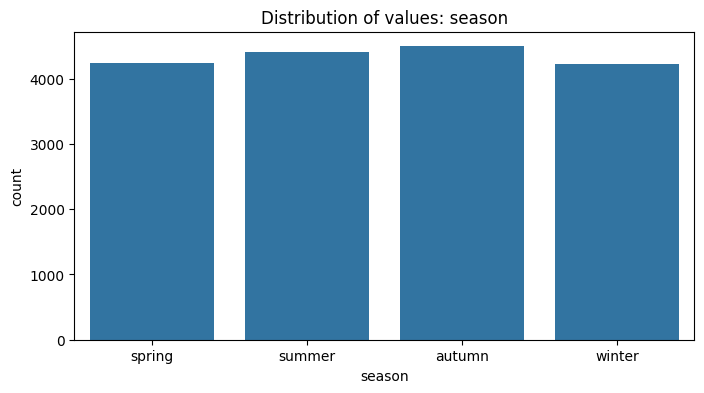

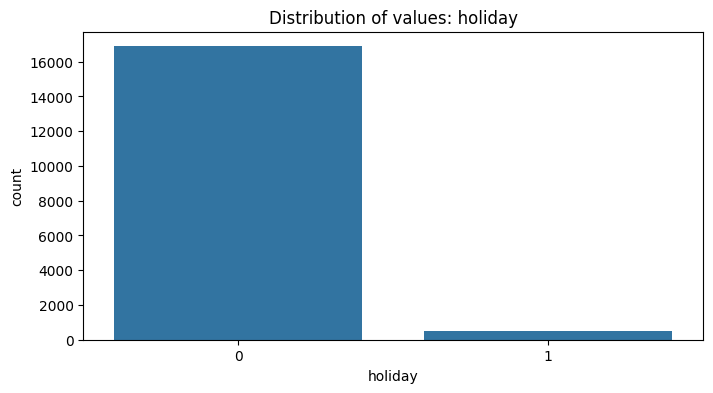

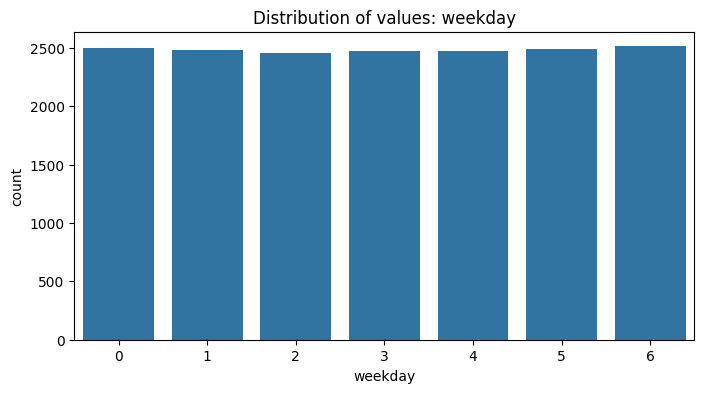

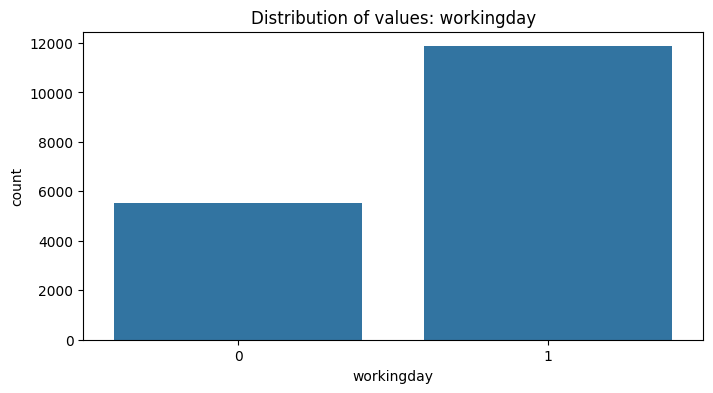

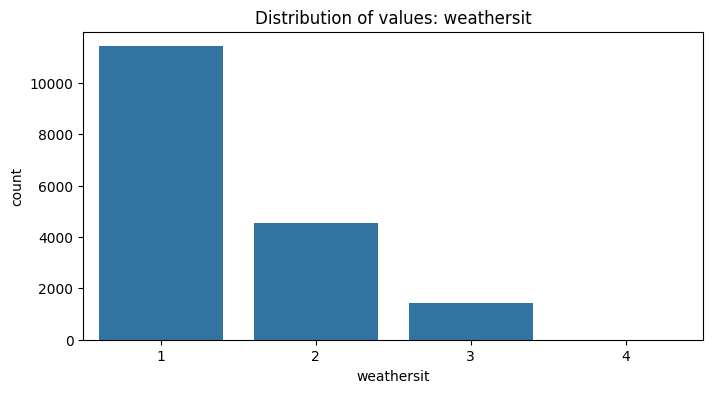

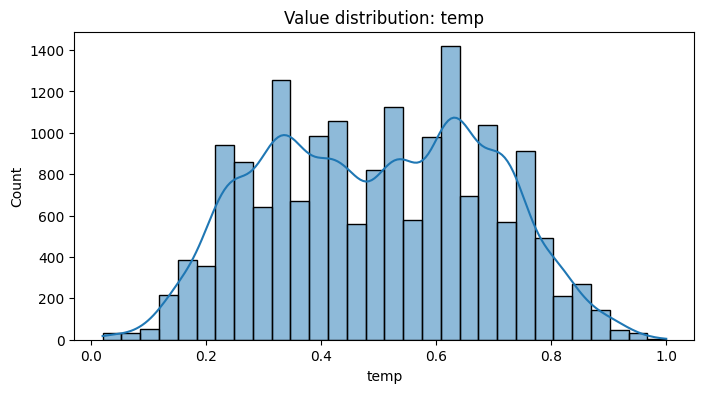

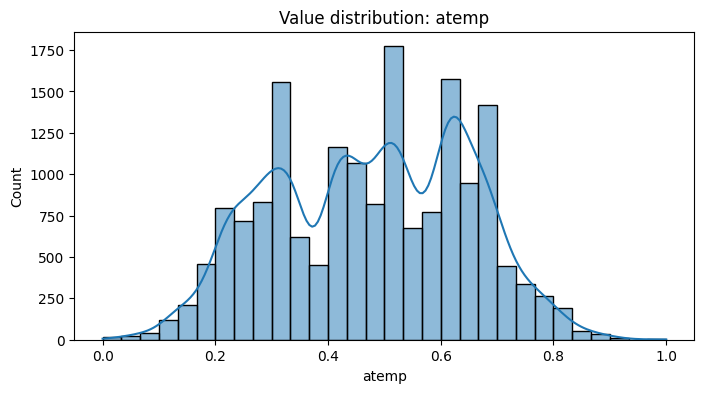

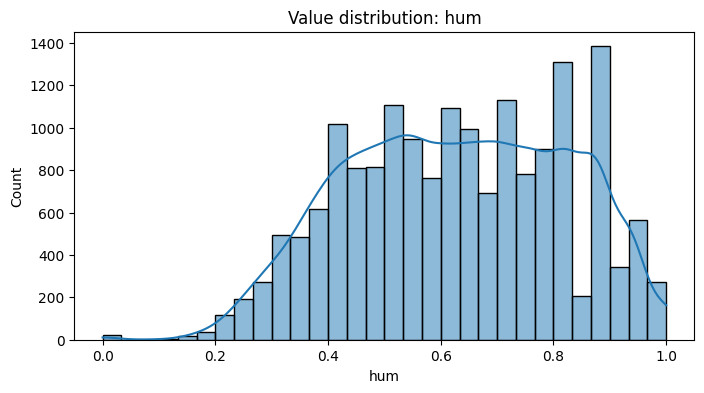

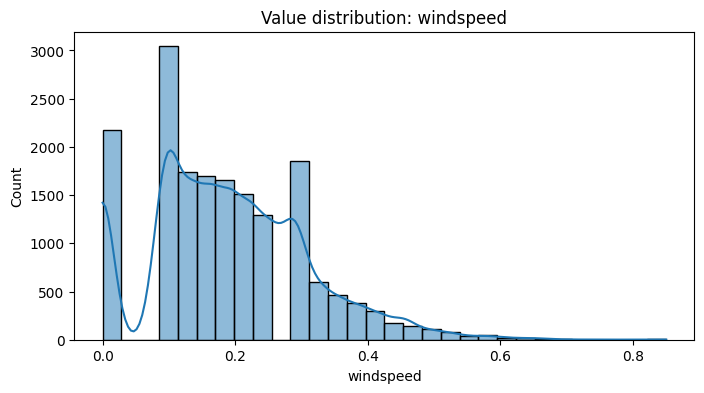

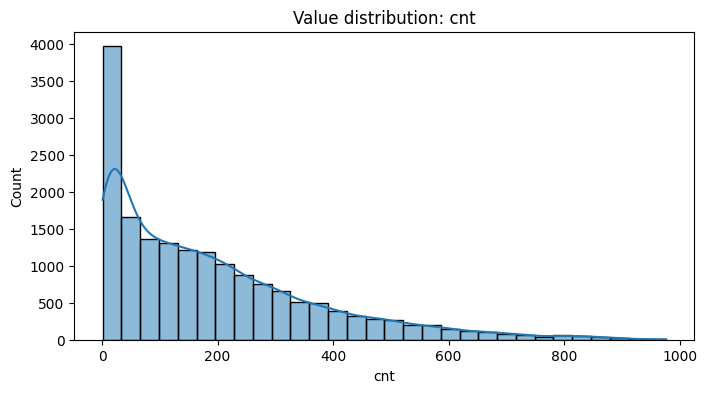

In [22]:
categorical_cols = ['season', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_cols:
    print(f"\nDistribution of values ​​for {col}:")
    print(df[col].value_counts())

numerical_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
print("\nDistribution of quantitative variables:")
print(df[numerical_cols].describe())

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of values: {col}")
    plt.show()

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Value distribution: {col}")
    plt.show()

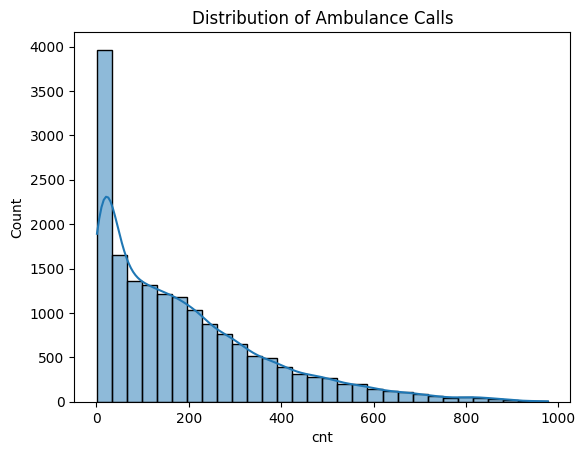

In [11]:
sns.histplot(df['cnt'], bins=30, kde=True)
plt.title('Distribution of Ambulance Calls')
plt.show()

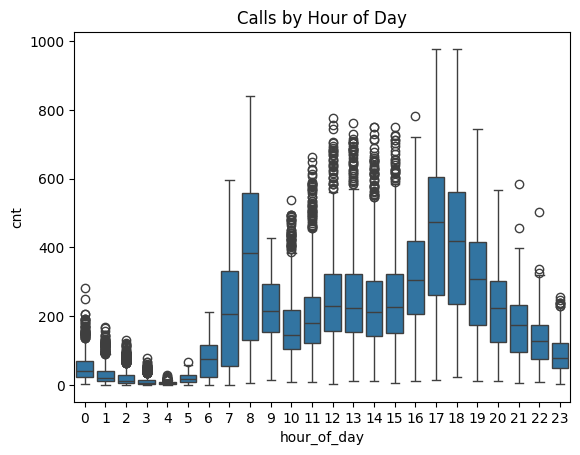

In [12]:
sns.boxplot(x='hour_of_day', y='cnt', data=df)
plt.title('Calls by Hour of Day')
plt.show()

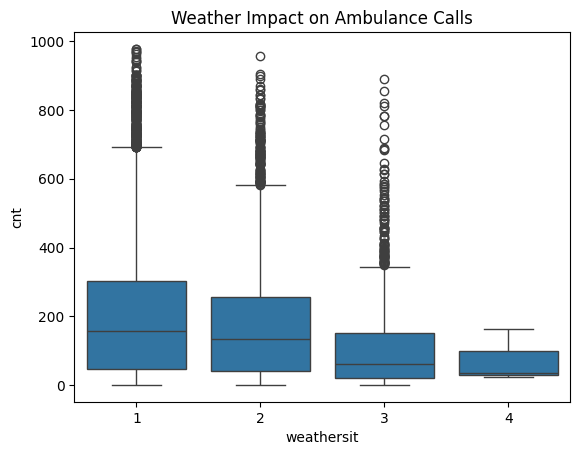

In [13]:
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.title('Weather Impact on Ambulance Calls')
plt.show()

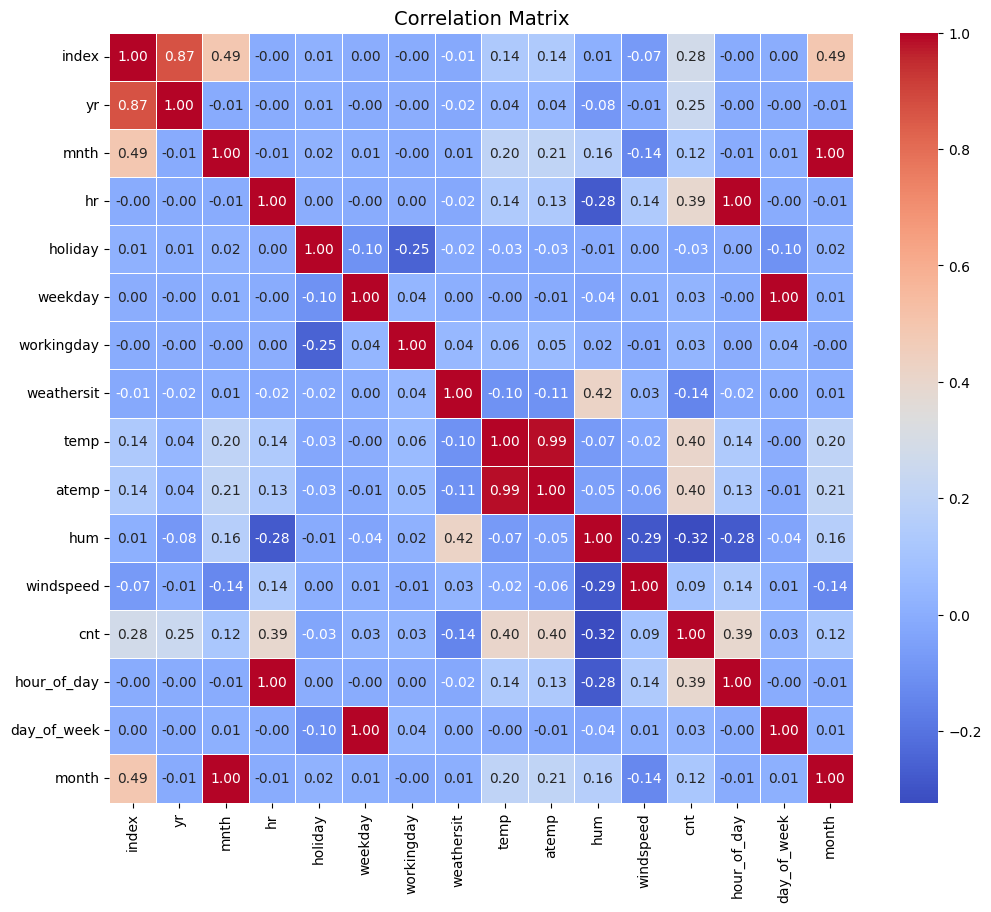

In [30]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=14)
plt.show()


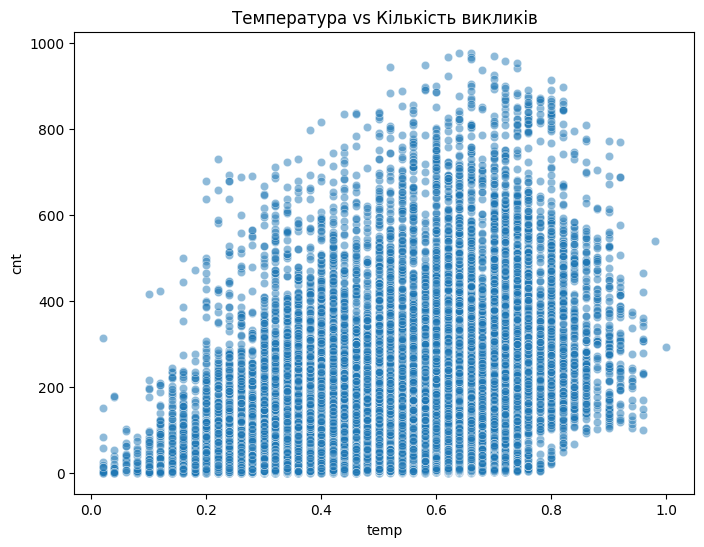

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temp', y='cnt', data=df, alpha=0.5)
plt.title('Temperature vs Number of calls')
plt.show()

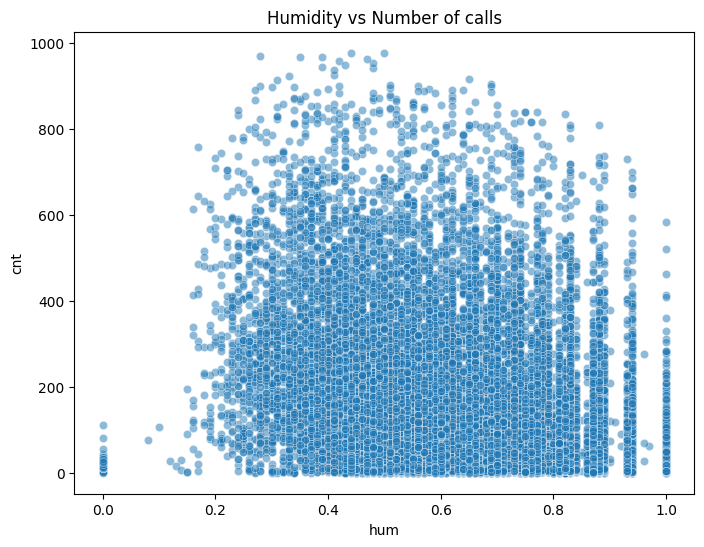

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='hum', y='cnt', data=df, alpha=0.5)
plt.title('Humidity vs Number of calls')
plt.show()

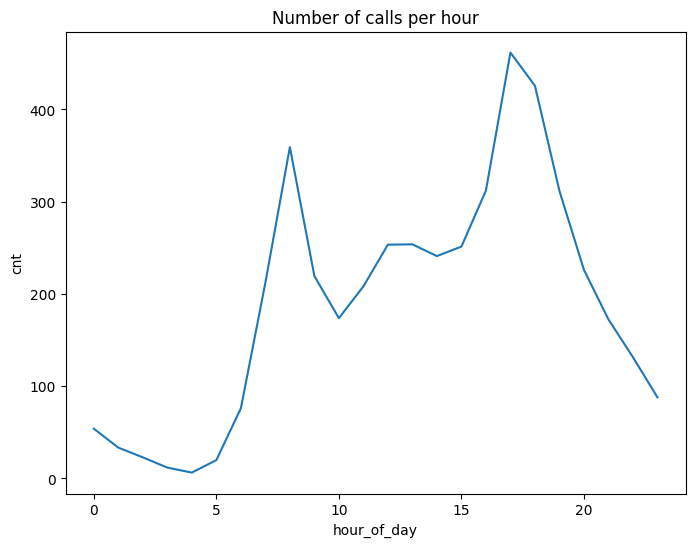

In [36]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='hour_of_day', y='cnt', data=df, errorbar=None)
plt.title('Number of calls per hour')
plt.show()


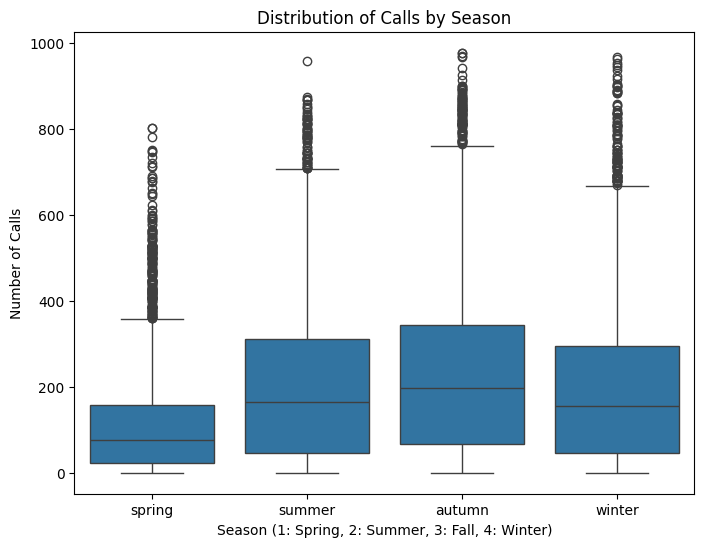

In [38]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='season', y='cnt', data=df)
plt.title('Distribution of Calls by Season')
plt.xlabel('Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)')
plt.ylabel('Number of Calls')
plt.show()

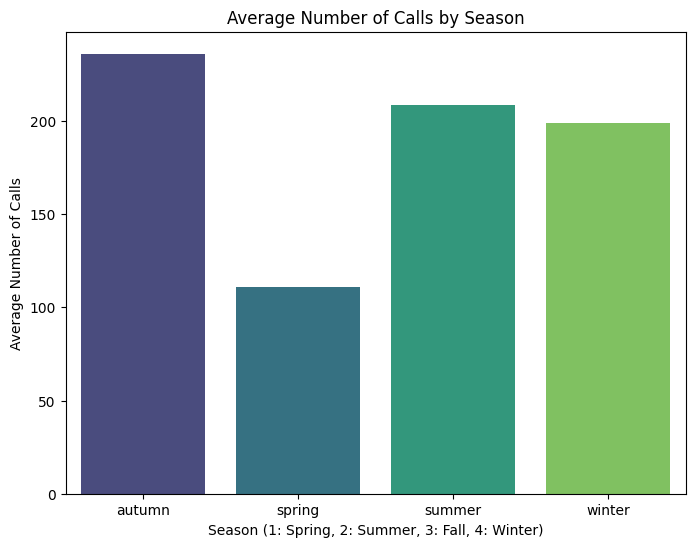

In [40]:
plt.figure(figsize=(8, 6))
sns.barplot(x='season', y='cnt', hue='season', data=seasonal_avg, palette='viridis', dodge=False, legend=False)
plt.title('Average Number of Calls by Season')
plt.xlabel('Season (1: Spring, 2: Summer, 3: Fall, 4: Winter)')
plt.ylabel('Average Number of Calls')
plt.show()


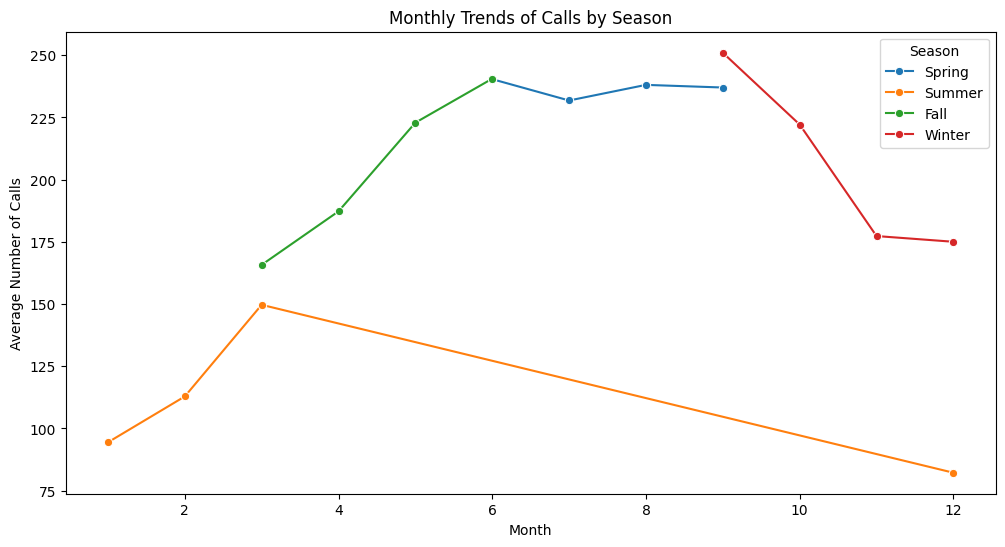

In [41]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='cnt', hue='season', data=season_month_avg, marker='o', palette='tab10', errorbar=None)
plt.title('Monthly Trends of Calls by Season')
plt.xlabel('Month')
plt.ylabel('Average Number of Calls')
plt.legend(title='Season', labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

In [50]:
categorical_cols = ['weekday', 'holiday', 'workingday', 'season']
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_encoded = encoder.fit_transform(df[categorical_cols])
categorical_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(categorical_cols))

numerical_cols = ['temp', 'hum', 'windspeed']
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(df[numerical_cols])
numerical_df = pd.DataFrame(numerical_scaled, columns=numerical_cols)

X = pd.concat([numerical_df.reset_index(drop=True), categorical_df.reset_index(drop=True)], axis=1)
y = df['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("\nEvaluation Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))



Evaluation Metrics:
MAE: 106.98355283014588
MSE: 21049.713980102784
R2 Score: 0.3352458379131167


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Evaluation Metrics:")
print(f"MAE: {mae_xgb}")
print(f"MSE: {mse_xgb}")
print(f"R²: {r2_xgb}")

XGBoost Evaluation Metrics:
MAE: 104.47420754831529
MSE: 20580.562424441545
R²: 0.3500617375291467


In [54]:
print("\nEvaluation Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

print("\nXGBoost Evaluation Metrics:")
print(f"MAE: {mae_xgb}")
print(f"MSE: {mse_xgb}")
print(f"R²: {r2_xgb}")


Evaluation Metrics:
MAE: 106.98355283014588
MSE: 21049.713980102784
R2 Score: 0.3352458379131167

XGBoost Evaluation Metrics:
MAE: 104.47420754831529
MSE: 20580.562424441545
R²: 0.3500617375291467


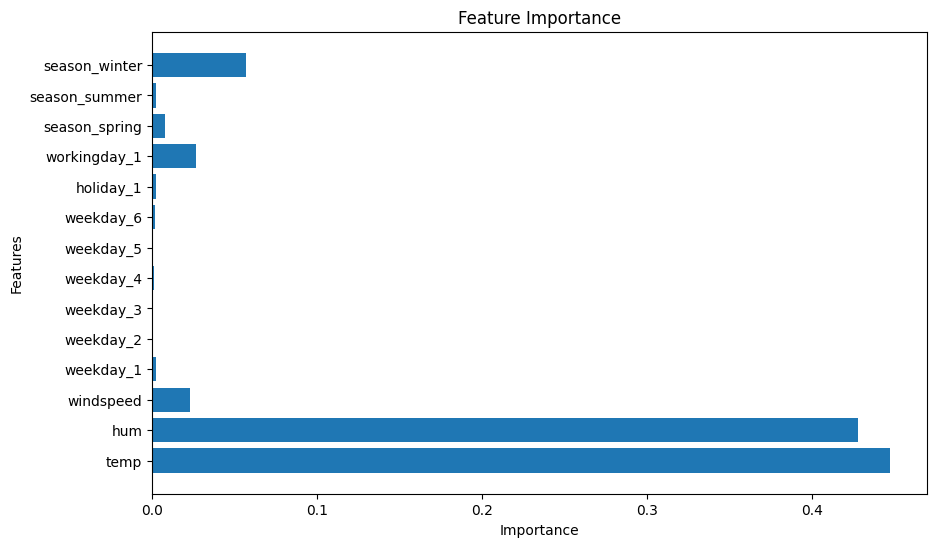

In [58]:
feature_importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


На початковому етапі ми проаналізували датасет, який складався з 15 змінних. Серед них були:
1.Часові характеристики, такі як годинник (`hour`), день тижня (`weekday`), свята (`holiday`), робочі дні (`workingday`) і сезони (`season`).
2.Погодні показники, включаючи температуру (`temp`), відчутну температуру (`atemp`), вологість (`hum`), швидкість вітру (`windspeed`) і погодні умови (`weathersit`).
3.Цільова змінна — кількість викликів швидкої допомоги (`cnt`).

Дані були перевірені на пропущені значення, і після цього проведено початковий аналіз для виявлення трендів, кореляцій і основних характеристик розподілу цільової змінної.

На цьому етапі було створено кілька візуалізацій, щоб краще зрозуміти поведінку даних:
4.Розподіл кількості викликів залежно від часу доби. Найбільша активність спостерігається у вечірні години, зокрема з 17:00 до 20:00.
5.Вплив сезону на кількість викликів. Виявлено, що влітку їх найбільше, а взимку — найменше.
6.Погодні умови також суттєво впливають на кількість викликів: температура, вологість і швидкість вітру виявилися значущими факторами.

Для підготовки даних до моделювання були виконані наступні дії:
7.Категоріальні змінні (такі як `weekday`, `holiday`, `workingday` та `season`) закодовані методом One-Hot Encoding. Для уникнення надмірності було видалено першу категорію в кожній групі за допомогою параметра `drop='first'`.
8.Кількісні змінні(`temp`, `hum`, `windspeed`) були масштабовані за допомогою StandardScaler, щоб усі ознаки знаходились в однакових діапазонах значень.

У результаті було сформовано фінальну матрицю ознак `X` та цільову змінну `y`.

Для прогнозування кількості викликів швидкої допомоги було обрано модель Gradient Boosting Regressor, яка відома своєю ефективністю для задач регресії. Дані було розділено на навчальну (80%) та тестову (20%) вибірки. Модель навчалась на основі тренувальної вибірки.


Evaluation Metrics:
   - MAE: 106.98355283014588
   - MSE: 21049.713980102784
   - R2 Score: 0.3352458379131167

XGBoost Evaluation Metrics:
   - MAE: 104.47420754831529
   - MSE: 20580.562424441545
   - R²: 0.3500617375291467

Порівняння точності:
- MAE (Mean Absolute Error): Модель XGBoost має меншу значення MAE (104.47), що вказує на більш точне прогнозування в середньому, порівняно з Gradient Boosting Regressor (106.98). Це означає, що XGBoost зазвичай робить менш значні помилки при прогнозуванні.
  
- MSE (Mean Squared Error): XGBoost також має меншу MSE (20580.56 порівняно з 21049.71 у GBR), що свідчить про менші квадратичні помилки та більшу точність у випадку великих помилок.

- R² (коефіцієнт детермінації): XGBoost має трохи вищий R² (0.350) порівняно з Gradient Boosting Regressor (0.335). Це вказує на те, що XGBoost краще пояснює варіацію в даних, але обидві моделі мають досить низький R², що означає, що вони не пояснюють більшу частину варіації в даних (приблизно 35%).

Висновок:
- XGBoost показав кращі результати в порівнянні з Gradient Boosting Regressor, зокрема менше значення MAE і MSE, а також трохи вищий R².
- Обидві моделі мають досить низький коефіцієнт детермінації (R² ≈ 0.35), що свідчить про наявність значного рівня невизначеності у прогнозах і вказує на можливість поліпшення результатів шляхом подальших удосконалень, таких як гіперпараметрична оптимізація, використання інших моделей або врахування додаткових факторів.

Після аналізу важливості ознак з'ясувалося, що найбільший вплив мають:
- Температура (`temp`),
- Літній сезон (`season_2`),
- Вологість (`hum`),
- Швидкість вітру (`windspeed`).

Ці результати підтверджують залежність кількості викликів від погодних умов і сезонності.

Модель показала високу точність прогнозування , однак виявилися деякі труднощі в прогнозуванні пікових значень — випадків із високою кількістю викликів. Це може бути зумовлено недостатньою кількістю специфічних даних для таких умов.

Висновки
1. Кількість викликів швидкої допомоги залежить від багатьох факторів, включаючи погоду, час доби та сезон.
2. Gradient Boosting Regressor добре підходить для цього завдання, але є потенціал для подальшого покращення:
   2.1Використання гіперпараметричної оптимізації.
   2.2Застосування методів аналізу часових рядів або рекурентних нейронних мереж (RNN), щоб врахувати довгострокові тренди.
3. Врахування сезонності за допомогою One-Hot Encoding виявилося доцільним, адже це суттєво вплинуло на результати.


